
# Two-Cluster KMeans on Breast Cancer Diagnostic Dataset

This notebook builds **two clusters** using KMeans on the uploaded `Breast_Cancer_Diagnostic.csv` dataset and walks through:
1) Data loading & quick EDA  
2) Feature scaling  
3) KMeans (k = 2) clustering  
4) Cluster diagnostics & interpretation (sizes, centroids)  
5) 2D visualization with PCA  
6) Saving clustered results

> Notes:  
> - Charts use **matplotlib** only (no seaborn), each as a **single plot**, and **no manual colors** are set.  
> - Re-run cells from top to bottom for reproducibility.


In [1]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Display settings
pd.set_option('display.max_columns', None)


## 1) Load the dataset

In [2]:

# Adjust path if you move this notebook
DATA_PATH = "/content/Breast_Cancer_Diagnostic.csv"
df = pd.read_csv(DATA_PATH)
df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## 2) Quick EDA

In [3]:

print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

display(df.describe().T)


Shape: (569, 10)

Data types:
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Missing values per column:
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


## 3) Feature Scaling

In [4]:

# Standardize features for fair distance-based clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)

print("Scaled shape:", X_scaled.shape)


Scaled shape: (569, 10)


## 4) KMeans Clustering (k = 2)

In [5]:

k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Attach labels
df_clusters = df.copy()
df_clusters['cluster'] = labels

# Basic diagnostics
sizes = df_clusters['cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(sizes)

# Silhouette (optional; meaningful for k>=2)
sil = silhouette_score(X_scaled, labels)
print("\nSilhouette score (higher is better, range roughly [-1, 1]):", round(sil, 4))


Cluster sizes:
cluster
0    400
1    169
Name: count, dtype: int64

Silhouette score (higher is better, range roughly [-1, 1]): 0.3946


### 4.1) Cluster Centroids

In [6]:

# Centroids in standardized space
centroids_scaled = kmeans.cluster_centers_

# Convert centroids back to original units for interpretability
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids_df = pd.DataFrame(
    centroids_original,
    columns=df.columns,
    index=[f"cluster_{i}" for i in range(k)]
)
display(centroids_df.T.head(15))  # show first 15 features/rows (here there are 10 total)


,cluster_0,cluster_1
radius_mean,12.461475,18.070053
texture_mean,18.360125,21.489704
perimeter_mean,80.155575,119.929882
area_mean,489.826250,1045.570414
smoothness_mean,0.092448,0.105621
compactness_mean,0.080290,0.161267
concavity_mean,0.048226,0.184831
concave points_mean,0.027936,0.098583
symmetry_mean,0.173982,0.198155
fractal_dimension_mean,0.062266,0.064056


## 5) 2D PCA Visualization

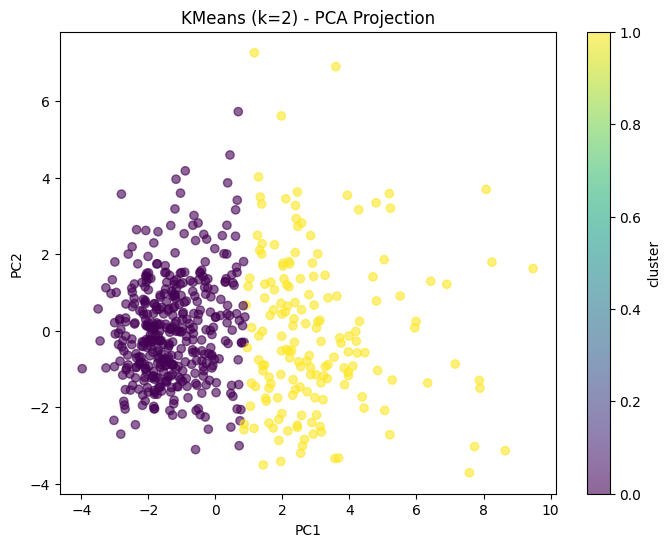

Explained variance by PC1 & PC2: [0.5479 0.2519]


In [7]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.6)
plt.title("KMeans (k=2) - PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="cluster")
plt.show()

print("Explained variance by PC1 & PC2:", np.round(pca.explained_variance_ratio_, 4))


## 6) Save Outputs

In [8]:

# Save clustered dataset
OUT_CSV = "/mnt/data/Breast_Cancer_Diagnostic_with_clusters.csv"
df_clusters.to_csv(OUT_CSV, index=False)
print("Saved clustered data to:", OUT_CSV)

# Also save centroids
OUT_CENTROIDS = "/mnt/data/Cluster_Centroids_k2.csv"
centroids_df.to_csv(OUT_CENTROIDS)
print("Saved centroids to:", OUT_CENTROIDS)


OSError: Cannot save file into a non-existent directory: '/mnt/data'